Description:

In this kata we are going to mimic a software versioning system.

You have to implement a VersionManager class.

It should accept an optional parameter that represents the initial version. The input will be in one of the following formats: "{MAJOR}", "{MAJOR}.{MINOR}", or "{MAJOR}.{MINOR}.{PATCH}". More values may be provided after PATCH but they should be ignored. If these 3 parts are not decimal values, an exception with the message "Error occured while parsing version!" should be thrown. If the initial version is not provided or is an empty string, use "0.0.1" by default.

This class should support the following methods, all of which should be chainable (except release):

major() - increase MAJOR by 1, set MINOR and PATCH to 0
minor() - increase MINOR by 1, set PATCH to 0
patch() - increase PATCH by 1
rollback() - return the MAJOR, MINOR, and PATCH to their values before the previous major/minor/patch call, or throw an exception with the message "Cannot rollback!" if there's no version to roll back to. Multiple calls to rollback() should be possible and restore the version history
release() - return a string in the format "{MAJOR}.{MINOR}.{PATCH}"
May the binary force be with you!

First request:
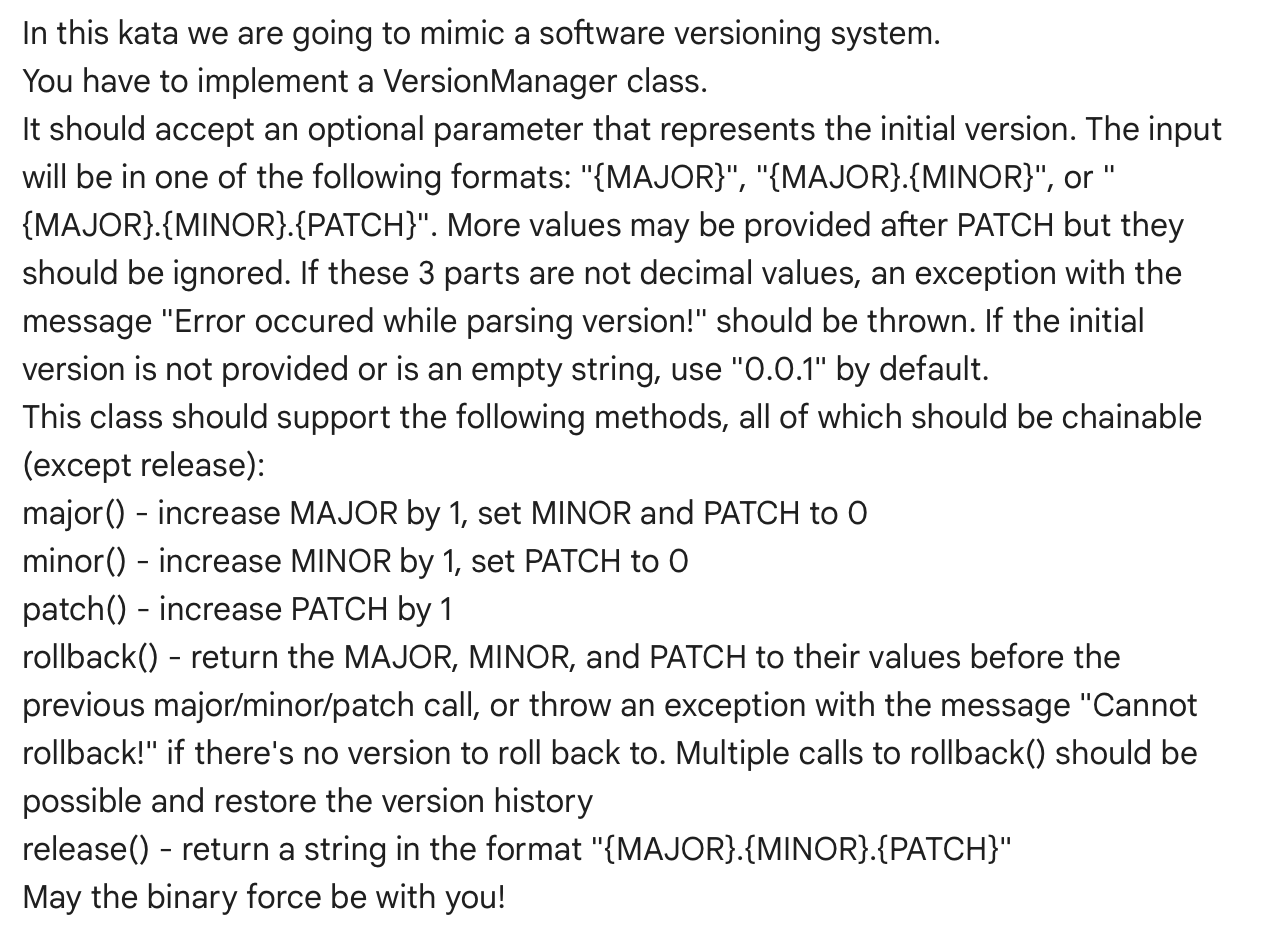

Gemini's response:

In [ ]:
class VersionManager:
  """
  Represents a software version manager with version history tracking.
  """
  def __init__(self, initial_version=""):
    """
    Initializes a VersionManager object with an optional initial version.

    Args:
      initial_version: The initial version string (optional). Defaults to "0.0.1".
    """
    self.version_history = []
    self.current_version = self._parse_version(initial_version or "0.0.1")
    self.version_history.append(self.current_version)

  def _parse_version(self, version_string):
    """
    Parses a version string into a tuple of major, minor, and patch integers.

    Args:
      version_string: The version string to parse.

    Returns:
      A tuple of (major, minor, patch) integers.

    Raises:
      ValueError: If the version string is not in a valid format or contains non-numeric parts.
    """
    try:
      parts = version_string.split(".")
      if len(parts) > 3:
        parts = parts[:3]
      return tuple(int(part) for part in parts)
    except ValueError:
      raise ValueError("Error occured while parsing version!")

  def major(self):
    """
    Increases the major version by 1, sets minor and patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    self.version_history.append((self.current_version[0] + 1, 0, 0))
    self.current_version = self.version_history[-1]
    return self

  def minor(self):
    """
    Increases the minor version by 1, sets patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    self.version_history.append((self.current_version[0], self.current_version[1] + 1, 0))
    self.current_version = self.version_history[-1]
    return self

  def patch(self):
    """
    Increases the patch version by 1.

    Returns:
      The VersionManager object for chaining.
    """
    self.version_history.append((self.current_version[0], self.current_version[1], self.current_version[2] + 1))
    self.current_version = self.version_history[-1]
    return self

  def rollback(self):
    """
    Rolls back to the previous version in the history.

    Returns:
      The VersionManager object for chaining.

    Raises:
      IndexError: If there's no previous version to roll back to.
    """
    if len(self.version_history) > 1:
      self.version_history.pop()
      self.current_version = self.version_history[-1]
    else:
      raise IndexError("Cannot rollback!")
    return self

  def release(self):
    """
    Returns the current version string in the format "{MAJOR}.{MINOR}.{PATCH}".

    Returns:
      The current version string.
    """
    return f"{self.current_version[0]}.{self.current_version[1]}.{self.current_version[2]}"

# Example usage
version_manager = VersionManager("1.2.3")
version_manager.major().minor().patch().release()  # Output: "2.1.1"
version_manager.rollback().rollback().release()  # Output: "1.2.2"
version_manager.patch().release()  # Output: "1.2.3"


Explanation to code:

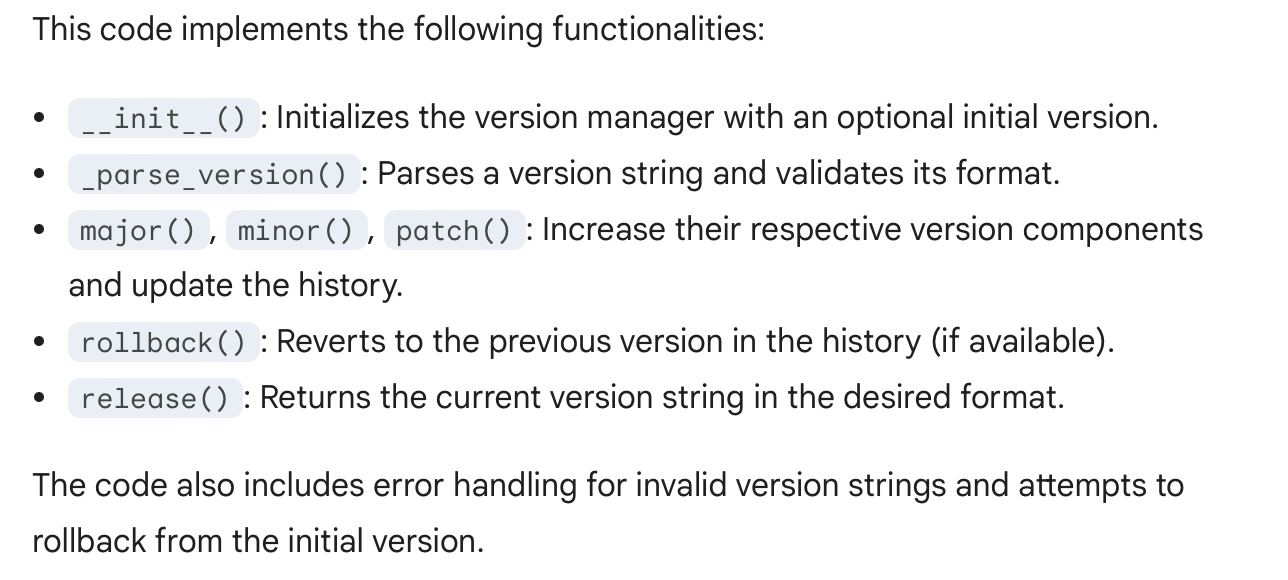

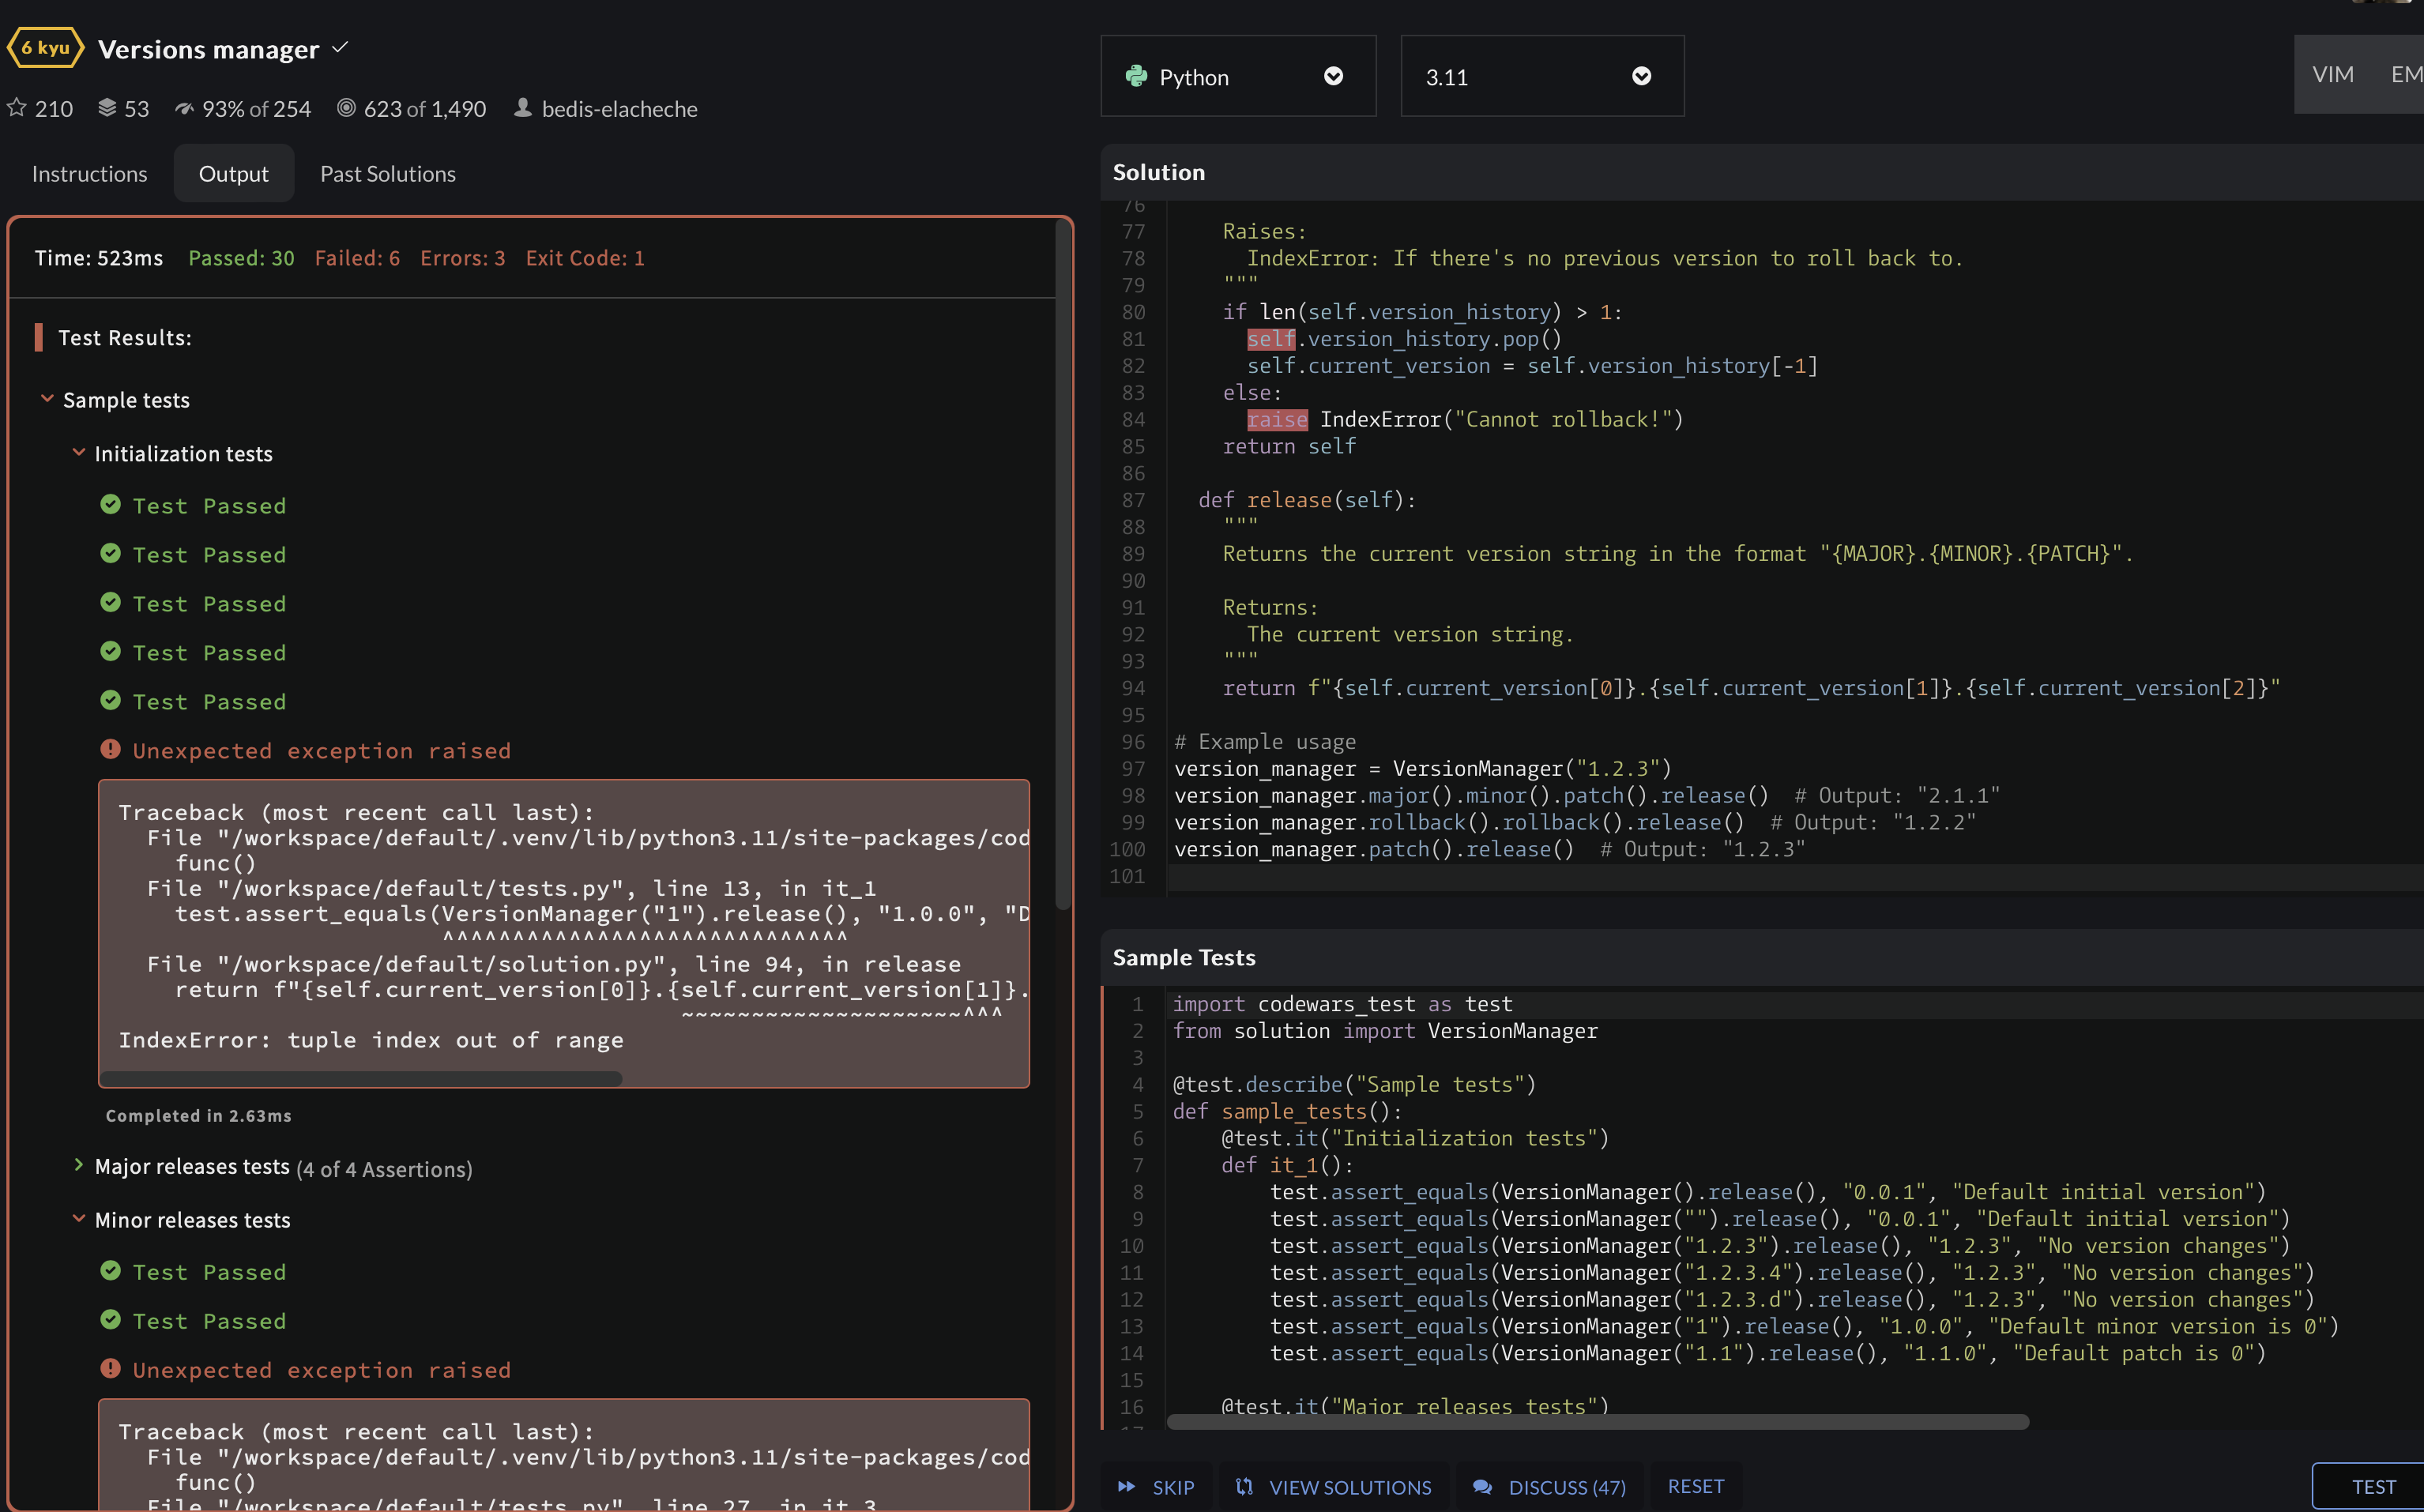

Next request:

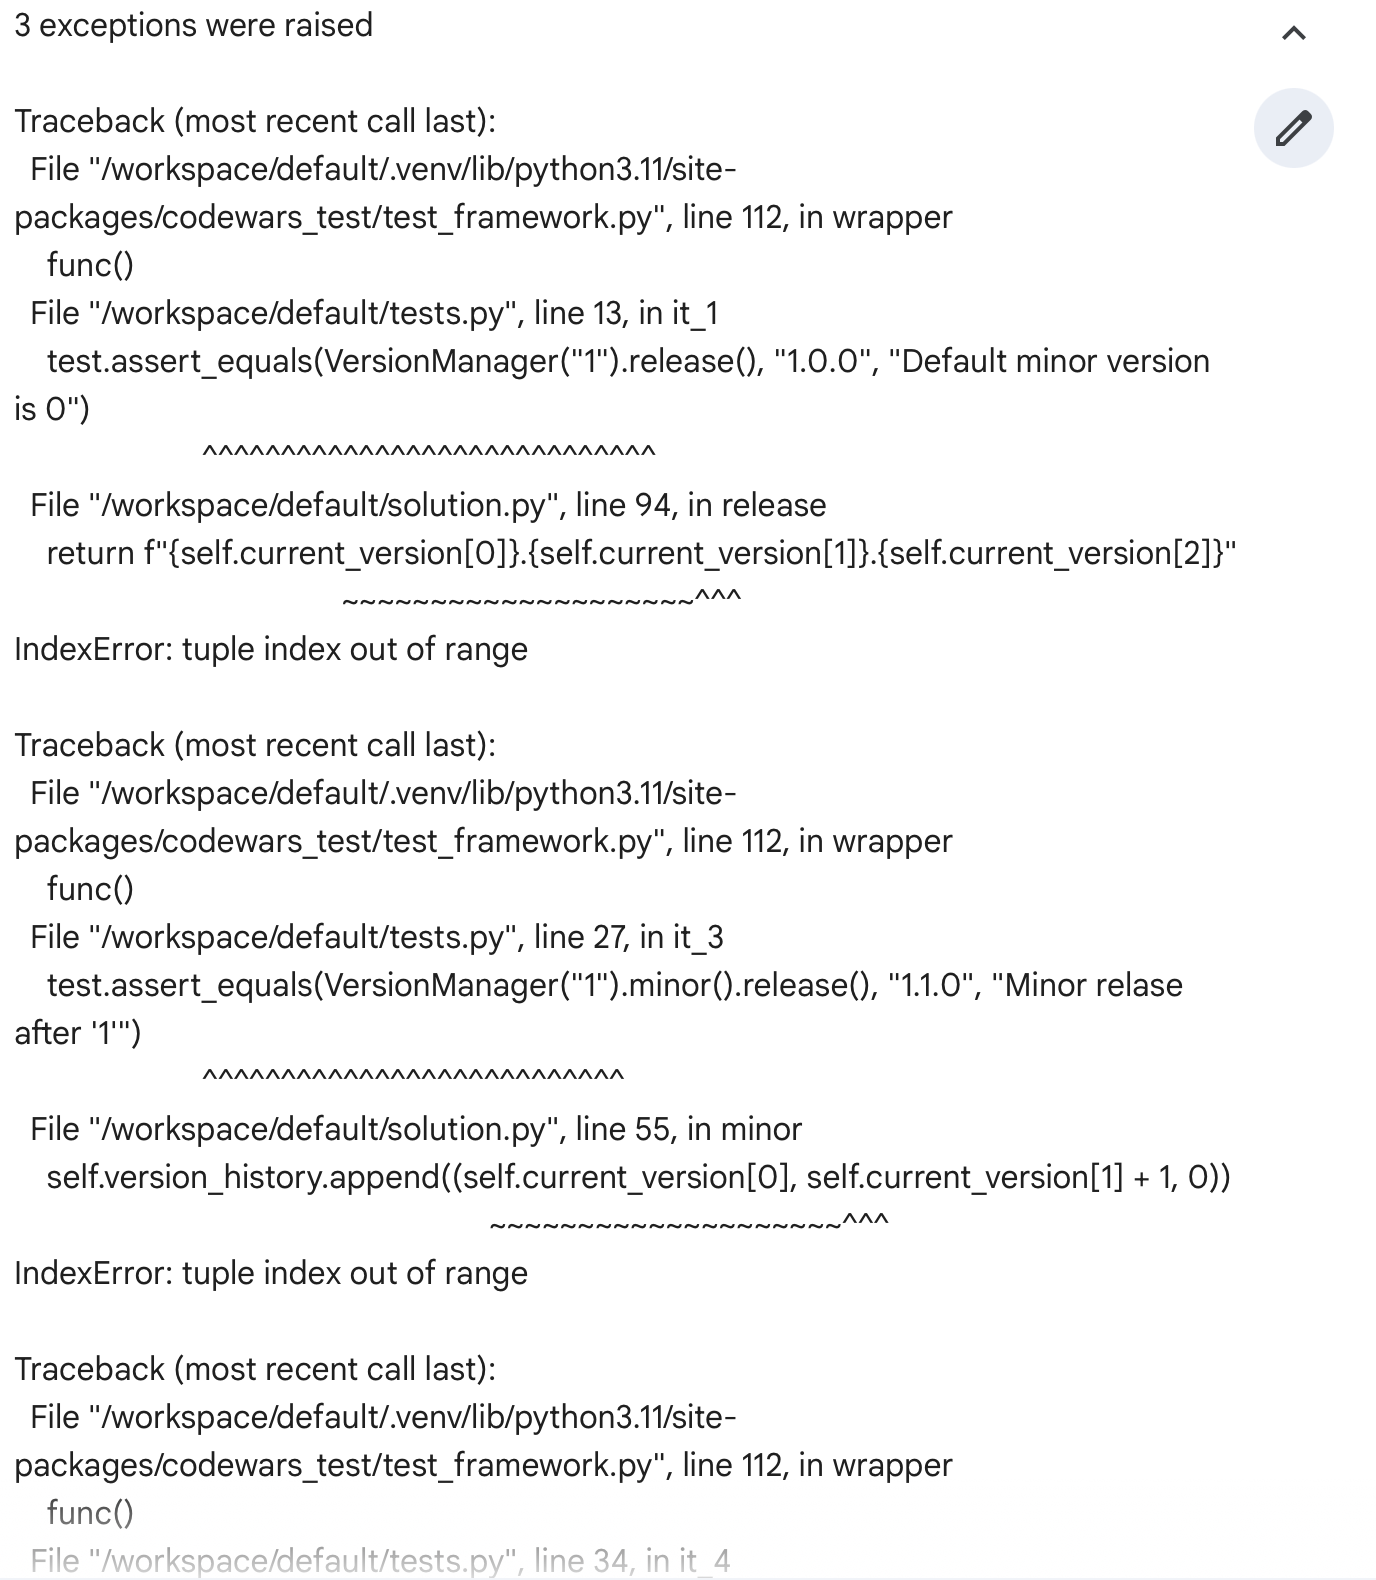

Gemini's response was only correcting initialization.

In [ ]:
class VersionManager:
  """
  Represents a software version manager with version history tracking.
  """
  def __init__(self, initial_version=""):
    self.version_history = []
    if not initial_version:
      initial_version = "0.0.1"
    self.current_version = self._parse_version(initial_version)
    self.version_history.append(self.current_version)


  def _parse_version(self, version_string):
    """
    Parses a version string into a tuple of major, minor, and patch integers.

    Args:
      version_string: The version string to parse.

    Returns:
      A tuple of (major, minor, patch) integers.

    Raises:
      ValueError: If the version string is not in a valid format or contains non-numeric parts.
    """
    try:
      parts = version_string.split(".")
      if len(parts) > 3:
        parts = parts[:3]
      return tuple(int(part) for part in parts)
    except ValueError:
      raise ValueError("Error occured while parsing version!")

  def major(self):
    """
    Increases the major version by 1, sets minor and patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    self.version_history.append((self.current_version[0] + 1, 0, 0))
    self.current_version = self.version_history[-1]
    return self

  def minor(self):
    """
    Increases the minor version by 1, sets patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    self.version_history.append((self.current_version[0], self.current_version[1] + 1, 0))
    self.current_version = self.version_history[-1]
    return self

  def patch(self):
    """
    Increases the patch version by 1.

    Returns:
      The VersionManager object for chaining.
    """
    self.version_history.append((self.current_version[0], self.current_version[1], self.current_version[2] + 1))
    self.current_version = self.version_history[-1]
    return self

  def rollback(self):
    """
    Rolls back to the previous version in the history.

    Returns:
      The VersionManager object for chaining.

    Raises:
      IndexError: If there's no previous version to roll back to.
    """
    if len(self.version_history) > 1:
      self.version_history.pop()
      self.current_version = self.version_history[-1]
    else:
      raise IndexError("Cannot rollback!")
    return self

  def release(self):
    """
    Returns the current version string in the format "{MAJOR}.{MINOR}.{PATCH}".

    Returns:
      The current version string.
    """
    return f"{self.current_version[0]}.{self.current_version[1]}.{self.current_version[2]}"

# Example usage
version_manager = VersionManager("1.2.3")
version_manager.major().minor().patch().release()  # Output: "2.1.1"
version_manager.rollback().rollback().release()  # Output: "1.2.2"
version_manager.patch().release()  # Output: "1.2.3"


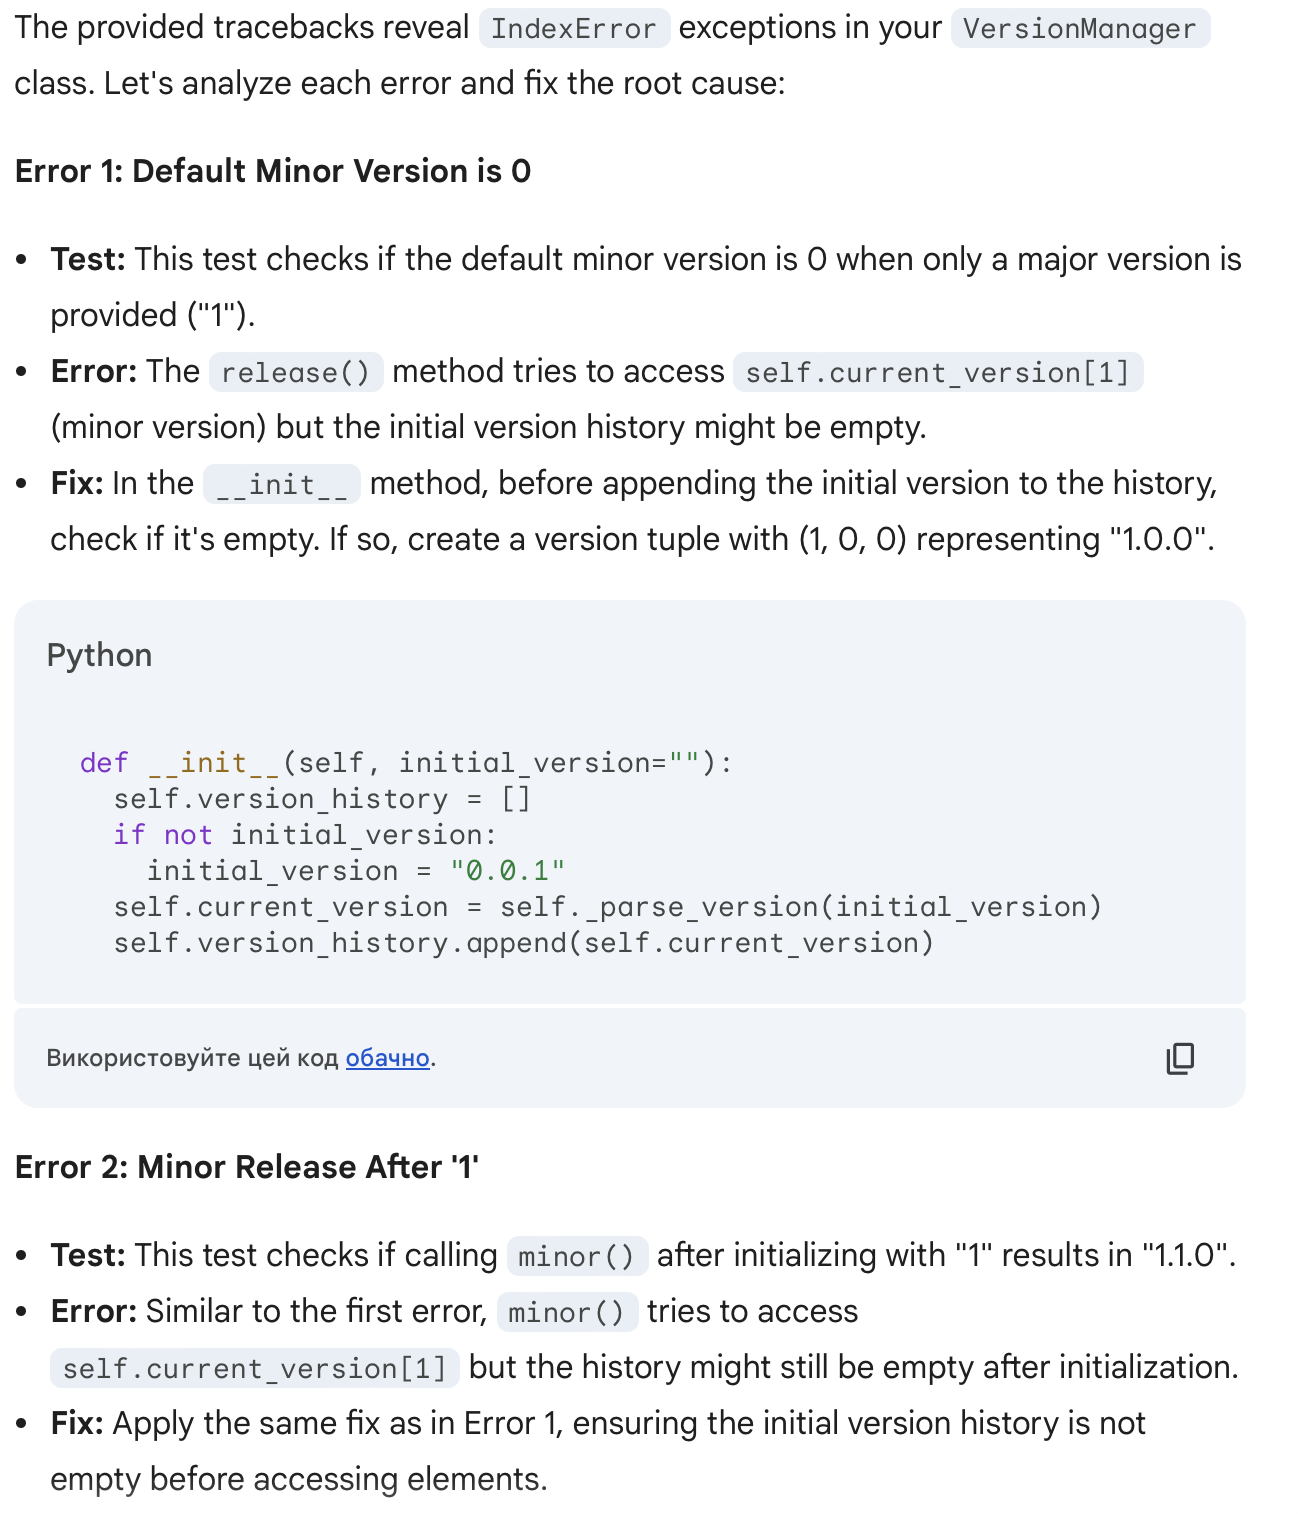

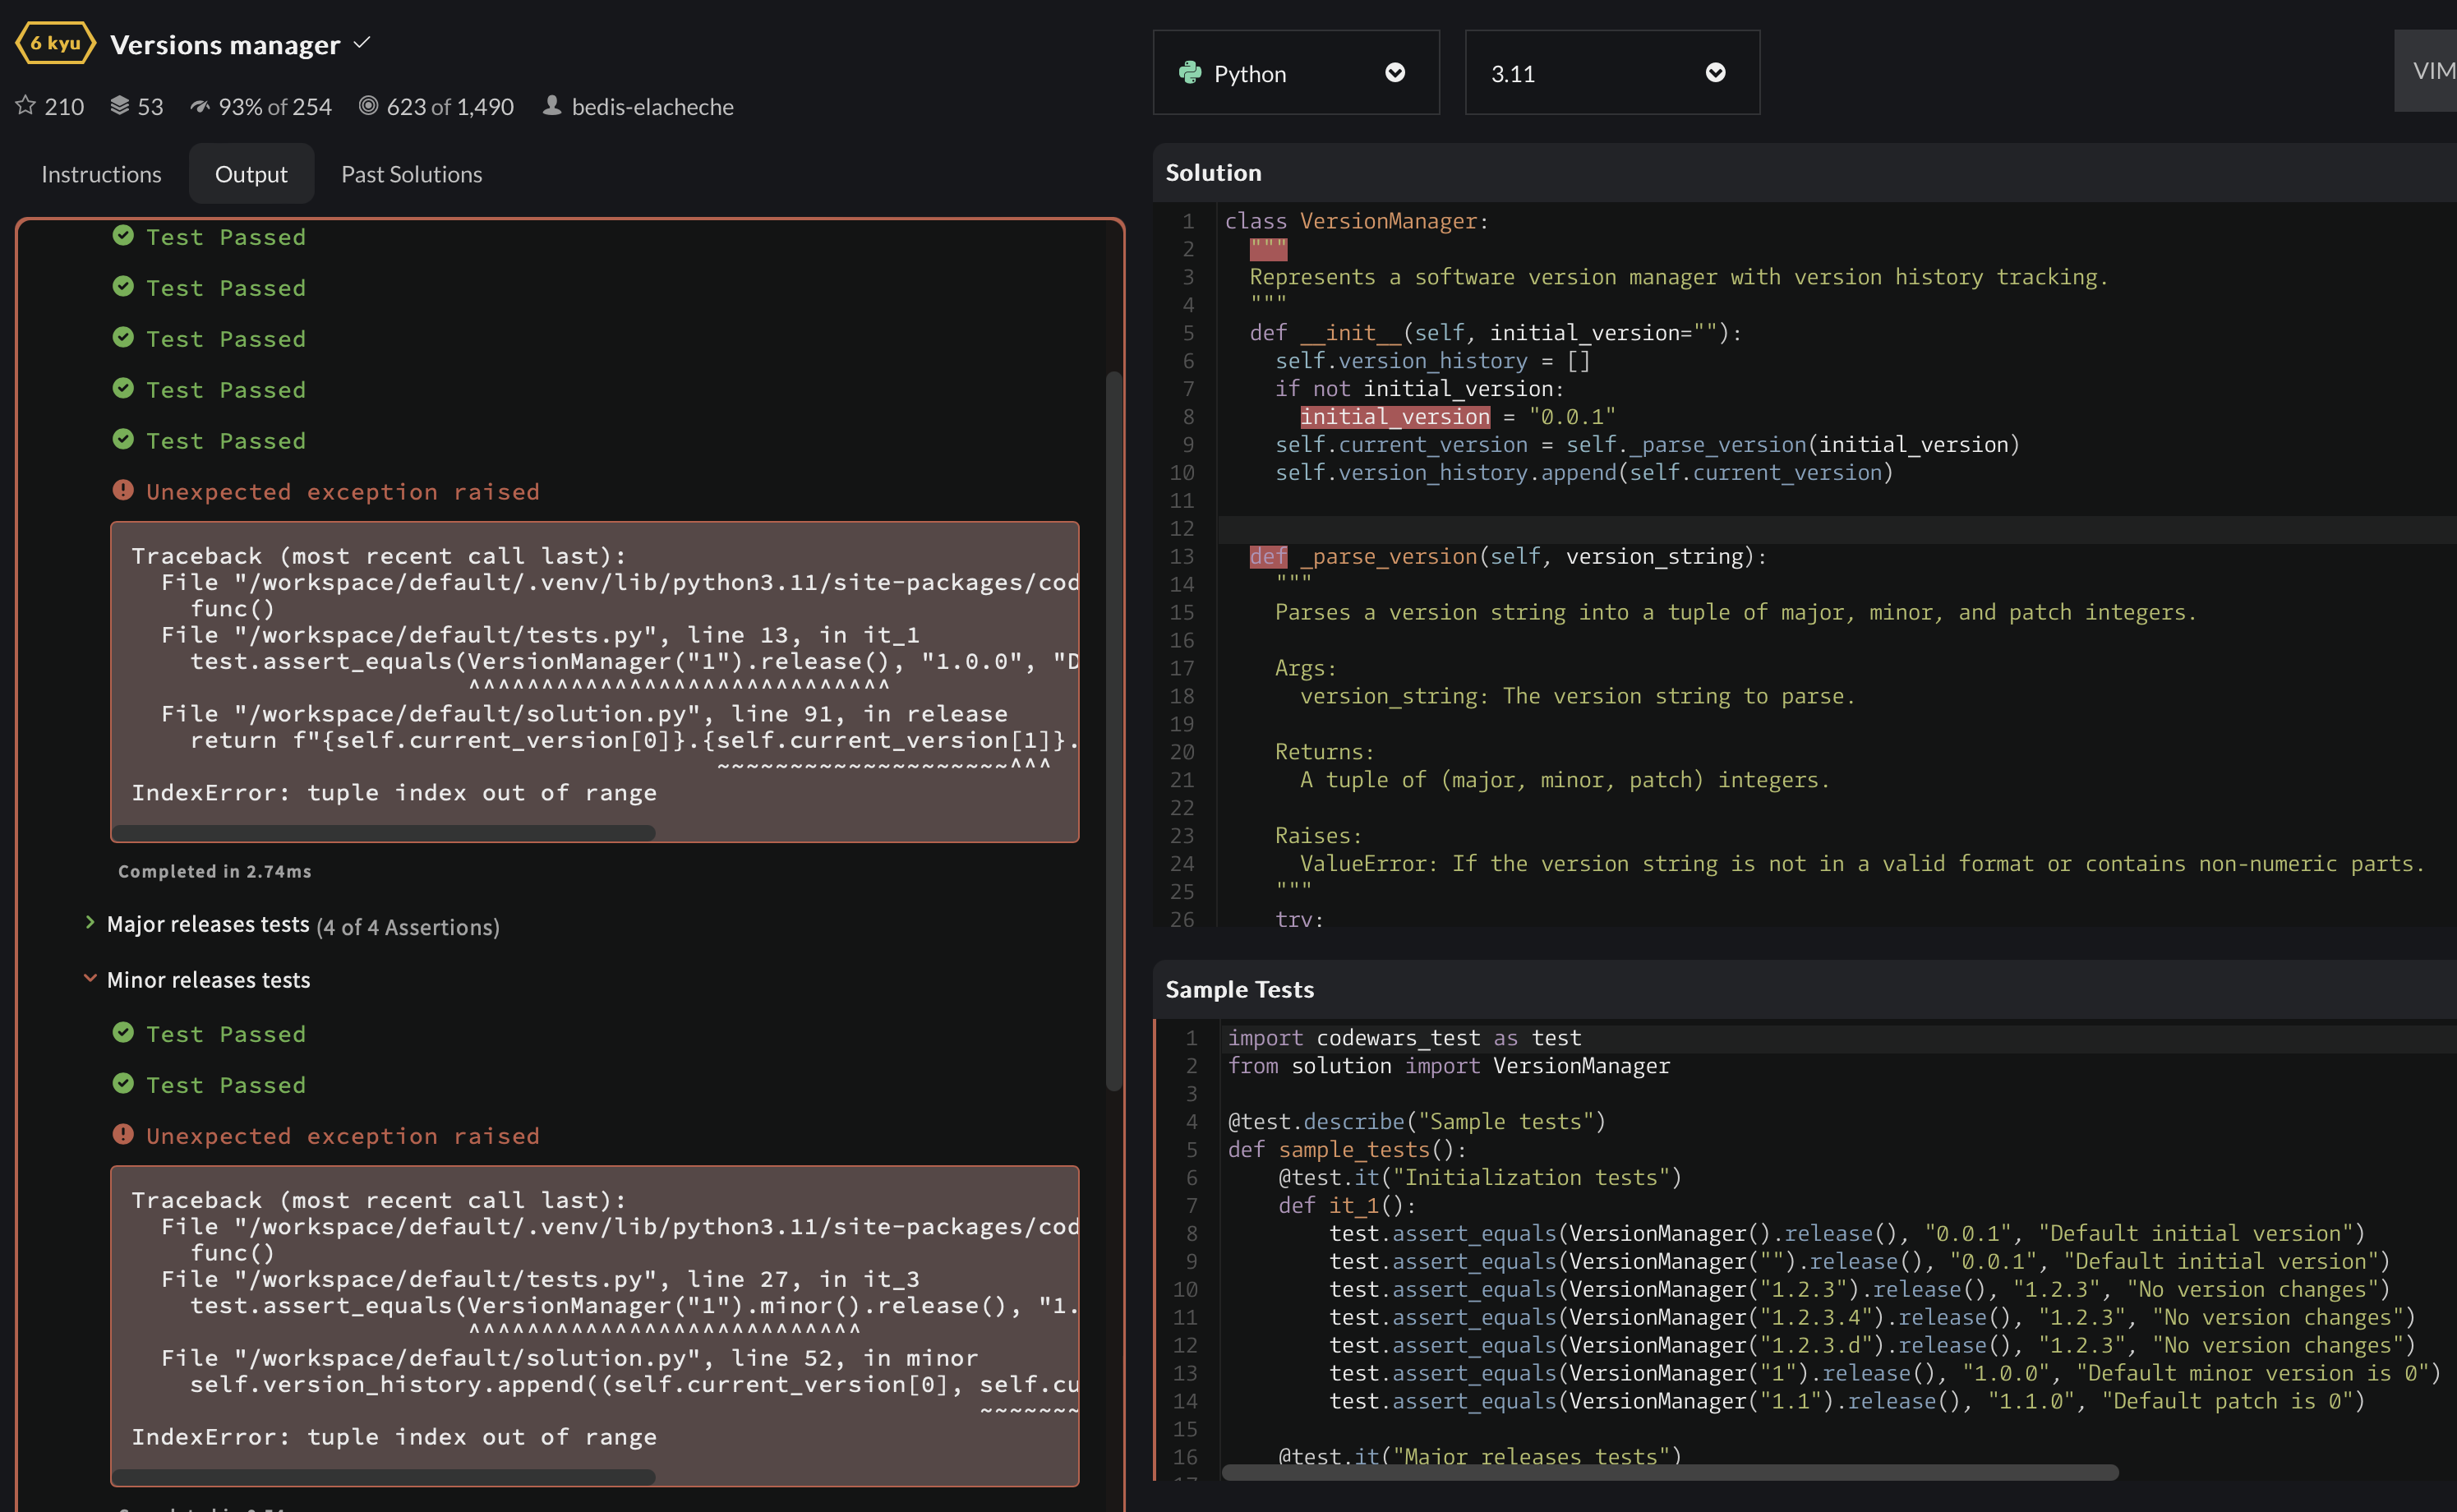

The third request:

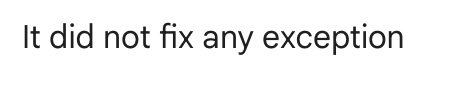
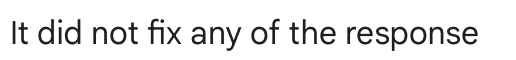

Gemini's response

In [ ]:
class VersionManager:
  """
  Represents a software version manager with version history tracking.
  """
  def __init__(self, initial_version=""):
    """
    Initializes a VersionManager object with an optional initial version.

    Args:
      initial_version: The initial version string (optional). Defaults to "0.0.1".
    """
    self.version_history = []
    self.current_version = self._parse_version(initial_version or "0.0.1")
    self.version_history.append(self.current_version)

  def _parse_version(self, version_string):
    """
    Parses a version string into a tuple of major, minor, and patch integers.

    Args:
      version_history: The version string to parse.

    Returns:
      A tuple of (major, minor, patch) integers.

    Raises:
      ValueError: If the version string is not in a valid format or contains non-numeric parts.
    """
    try:
      parts = version_string.split(".")
      if len(parts) > 3:
        parts = parts[:3]
      return tuple(int(part) for part in parts)
    except ValueError:
      raise ValueError("Error occured while parsing version!")

  def major(self):
    """
    Increases the major version by 1, sets minor and patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    # Always append the current version before modifying it
    self.version_history.append(self.current_version)
    self.current_version = (self.current_version[0] + 1, 0, 0)
    return self

  def minor(self):
    """
    Increases the minor version by 1, sets patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    # Always append the current version before modifying it
    self.version_history.append(self.current_version)
    self.current_version = (self.current_version[0], self.current_version[1] + 1, 0)
    return self

  def patch(self):
    """
    Increases the patch version by 1.

    Returns:
      The VersionManager object for chaining.
    """
    # Always append the current version before modifying it
    self.version_history.append(self.current_version)
    self.current_version = (self.current_version[0], self.current_version[1], self.current_version[2] + 1)
    return self

  def rollback(self):
    """
    Rolls back to the previous version in the history.

    Returns:
      The VersionManager object for chaining.

    Raises:
      IndexError: If there's no previous version to roll back to.
    """
    if len(self.version_history) > 1:
      self.current_version = self.version_history.pop()
    else:
      raise IndexError("Cannot rollback!")
    return self

  def release(self):
    """
    Returns the current version string in the format "{MAJOR}.{MINOR}.{PATCH}".

    Returns:
      The current version string.
    """
    return f"{self.current_version[0]}.{self.current_version[1]}.{self.current_version[2]}"


Some explanations:

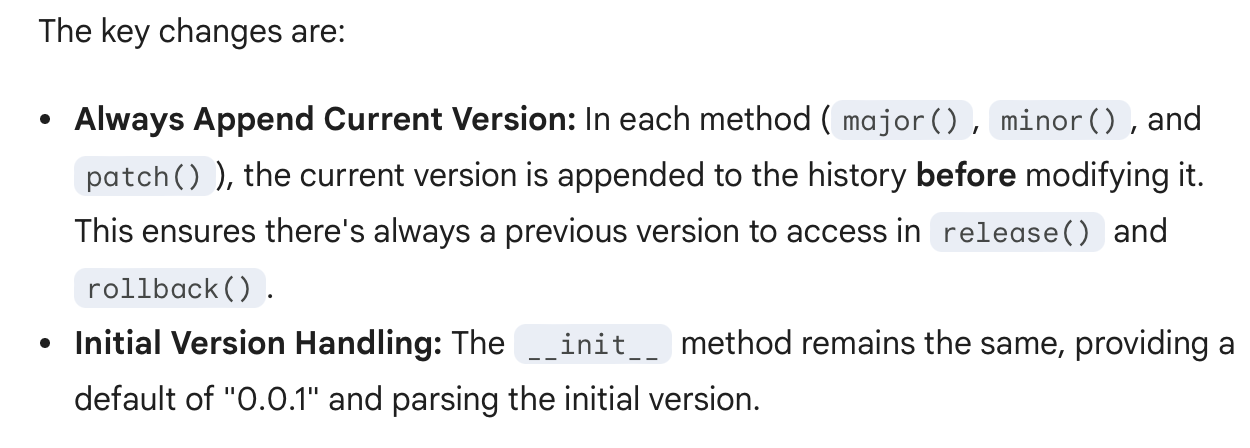

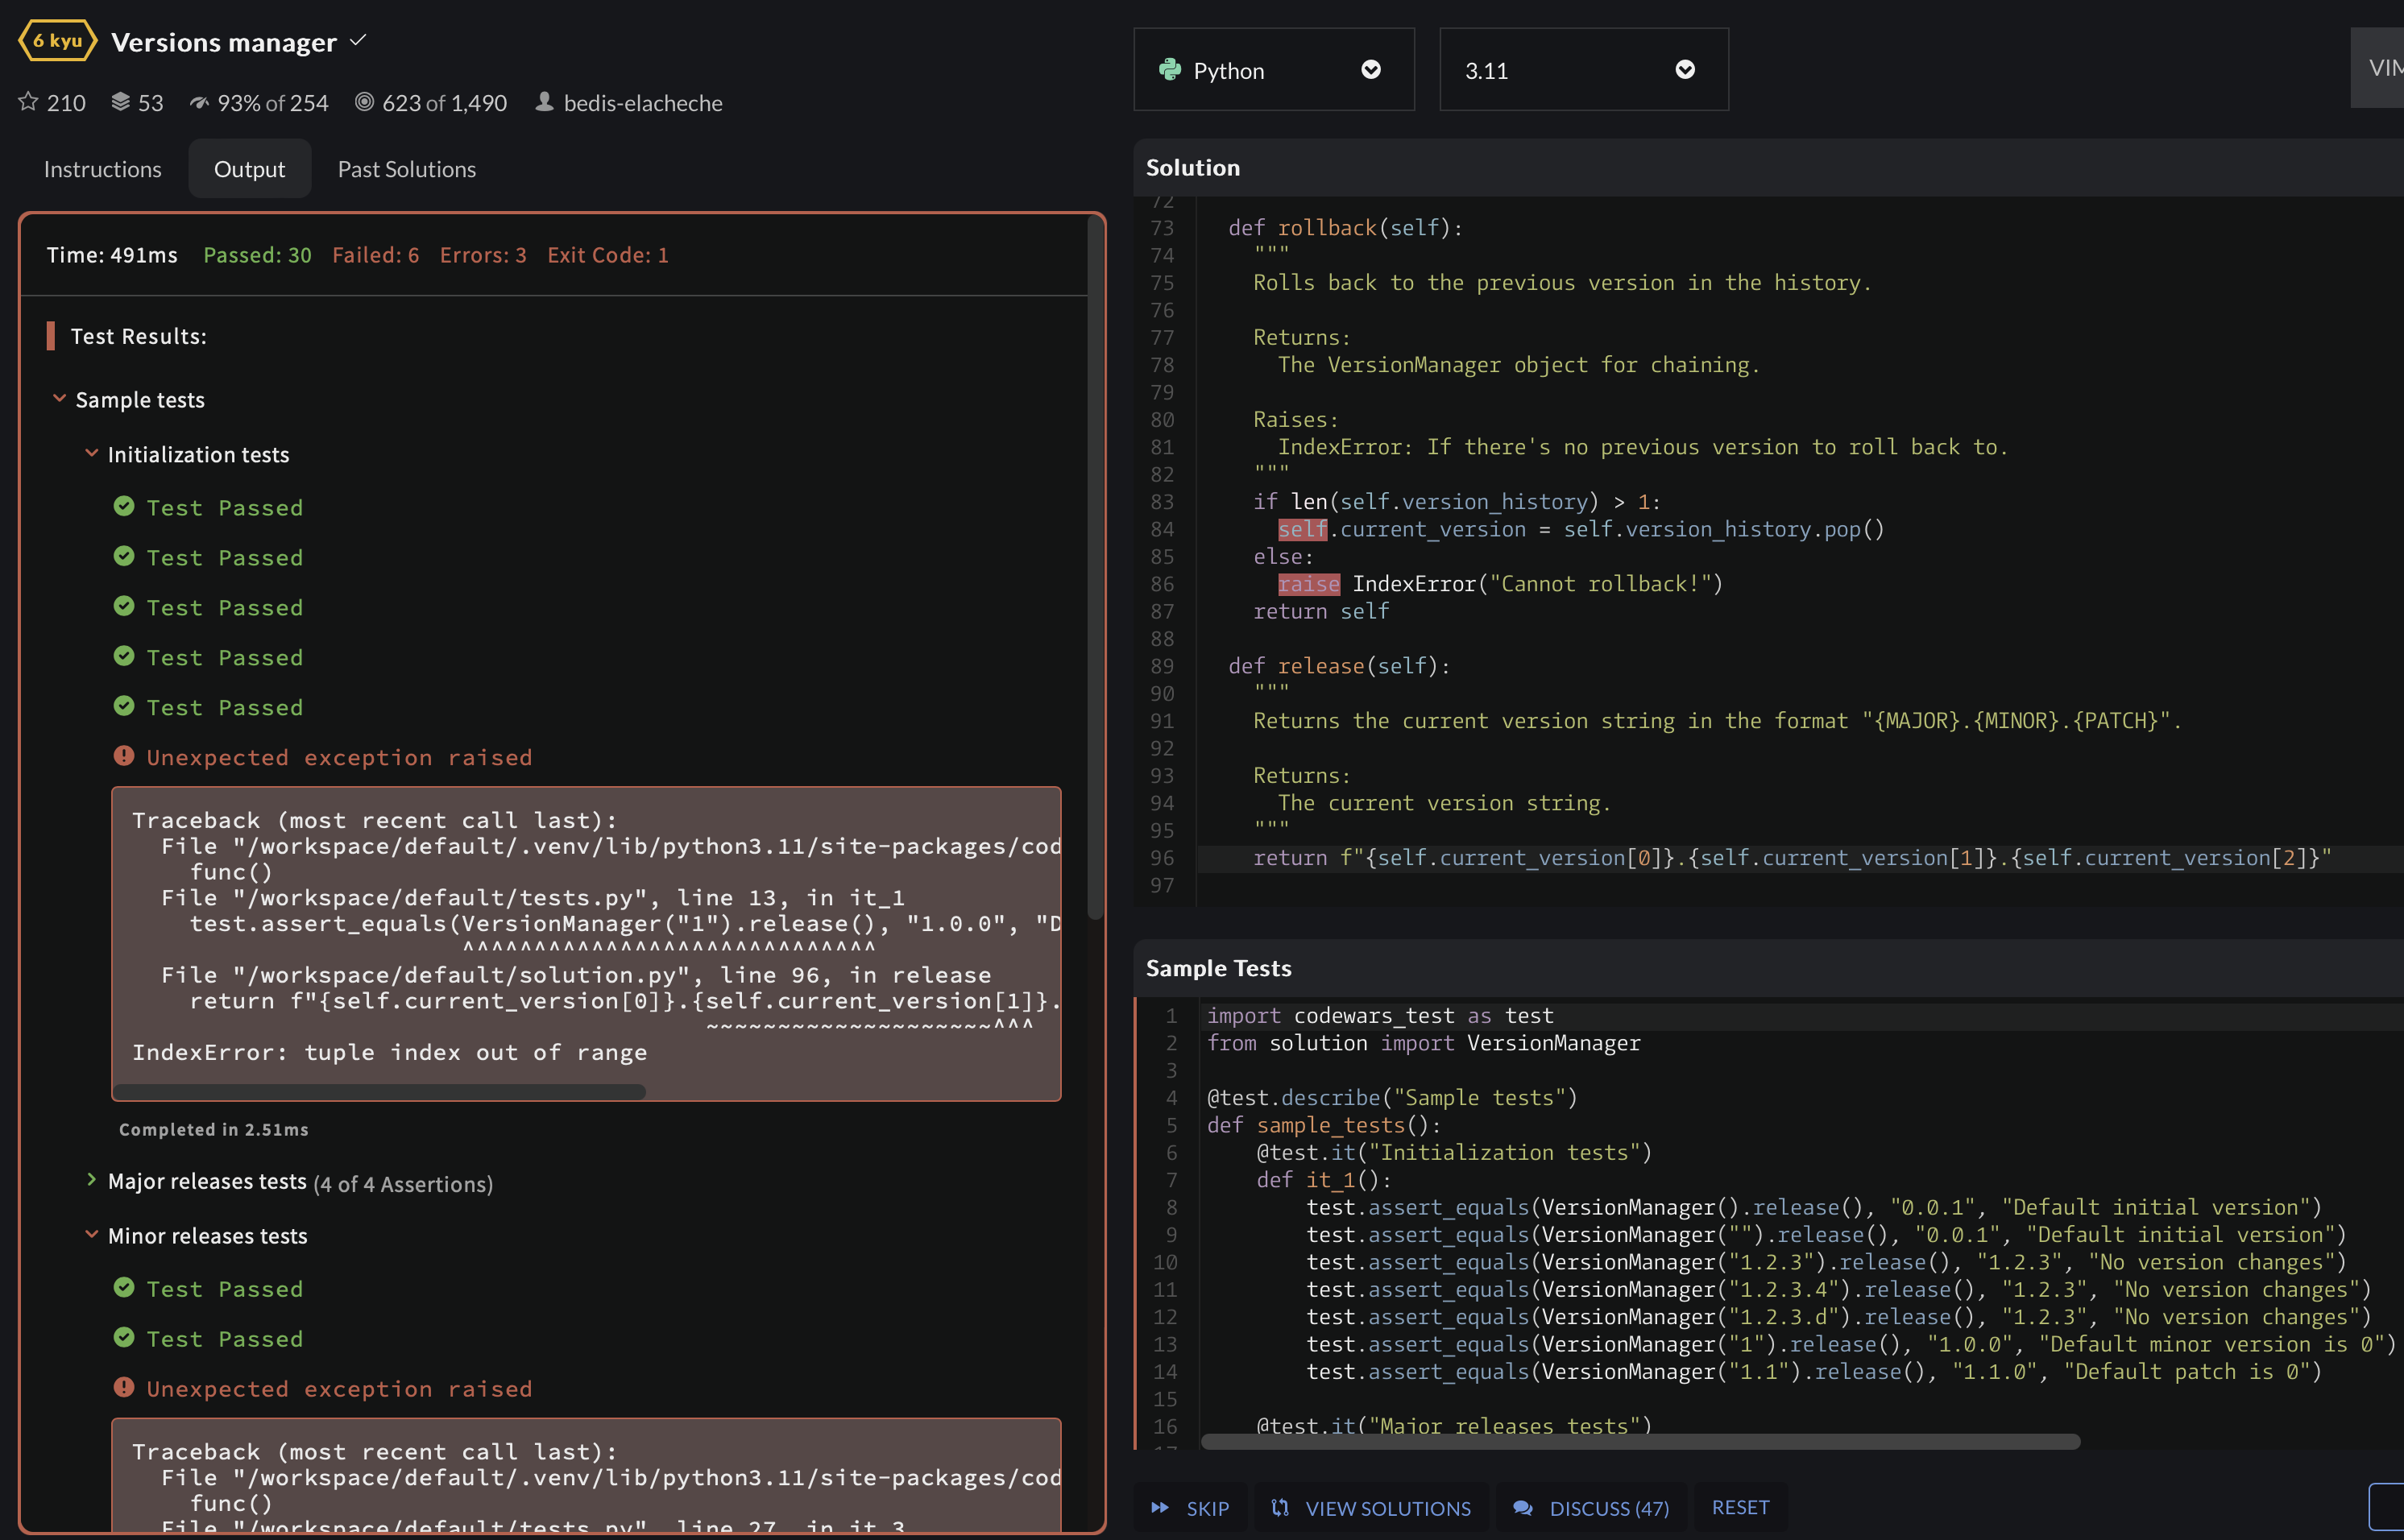

I correct parsing when there are less than 3 numbers in input or when the first 3 elements are not digits.

In [ ]:
class VersionManager:
  """
  Represents a software version manager with version history tracking.
  """
  def __init__(self, initial_version=""):
    """
    Initializes a VersionManager object with an optional initial version.

    Args:
      initial_version: The initial version string (optional). Defaults to "0.0.1".
    """
    self.version_history = []
    self.current_version = self._parse_version(initial_version or "0.0.1")
    self.version_history.append(self.current_version)

  def _parse_version(self, version_string):
    """
    Parses a version string into a tuple of major, minor, and patch integers.

    Args:
      version_history: The version string to parse.

    Returns:
      A tuple of (major, minor, patch) integers.

    Raises:
      ValueError: If the version string is not in a valid format or contains non-numeric parts.
    """
    try:
      parts = version_string.split(".")
      if len(parts) < 3:
        parts += '0' * (3-len(parts))
      return (int(parts[0]), int(parts[1]), int(parts[2]))
    except ValueError:
      raise ValueError("Error occured while parsing version!")

  def major(self):
    """
    Increases the major version by 1, sets minor and patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    # Always append the current version before modifying it
    self.version_history.append(self.current_version)
    self.current_version = (self.current_version[0] + 1, 0, 0)
    return self

  def minor(self):
    """
    Increases the minor version by 1, sets patch to 0.

    Returns:
      The VersionManager object for chaining.
    """
    # Always append the current version before modifying it
    self.version_history.append(self.current_version)
    self.current_version = (self.current_version[0], self.current_version[1] + 1, 0)
    return self

  def patch(self):
    """
    Increases the patch version by 1.

    Returns:
      The VersionManager object for chaining.
    """
    # Always append the current version before modifying it
    self.version_history.append(self.current_version)
    self.current_version = (self.current_version[0], self.current_version[1], self.current_version[2] + 1)
    return self

  def rollback(self):
    """
    Rolls back to the previous version in the history.

    Returns:
      The VersionManager object for chaining.

    Raises:
      IndexError: If there's no previous version to roll back to.
    """
    if len(self.version_history) > 1:
      self.current_version = self.version_history.pop()
    else:
      raise IndexError("Cannot rollback!")
    return self

  def release(self):
    """
    Returns the current version string in the format "{MAJOR}.{MINOR}.{PATCH}".

    Returns:
      The current version string.
    """
    return f"{self.current_version[0]}.{self.current_version[1]}.{self.current_version[2]}"

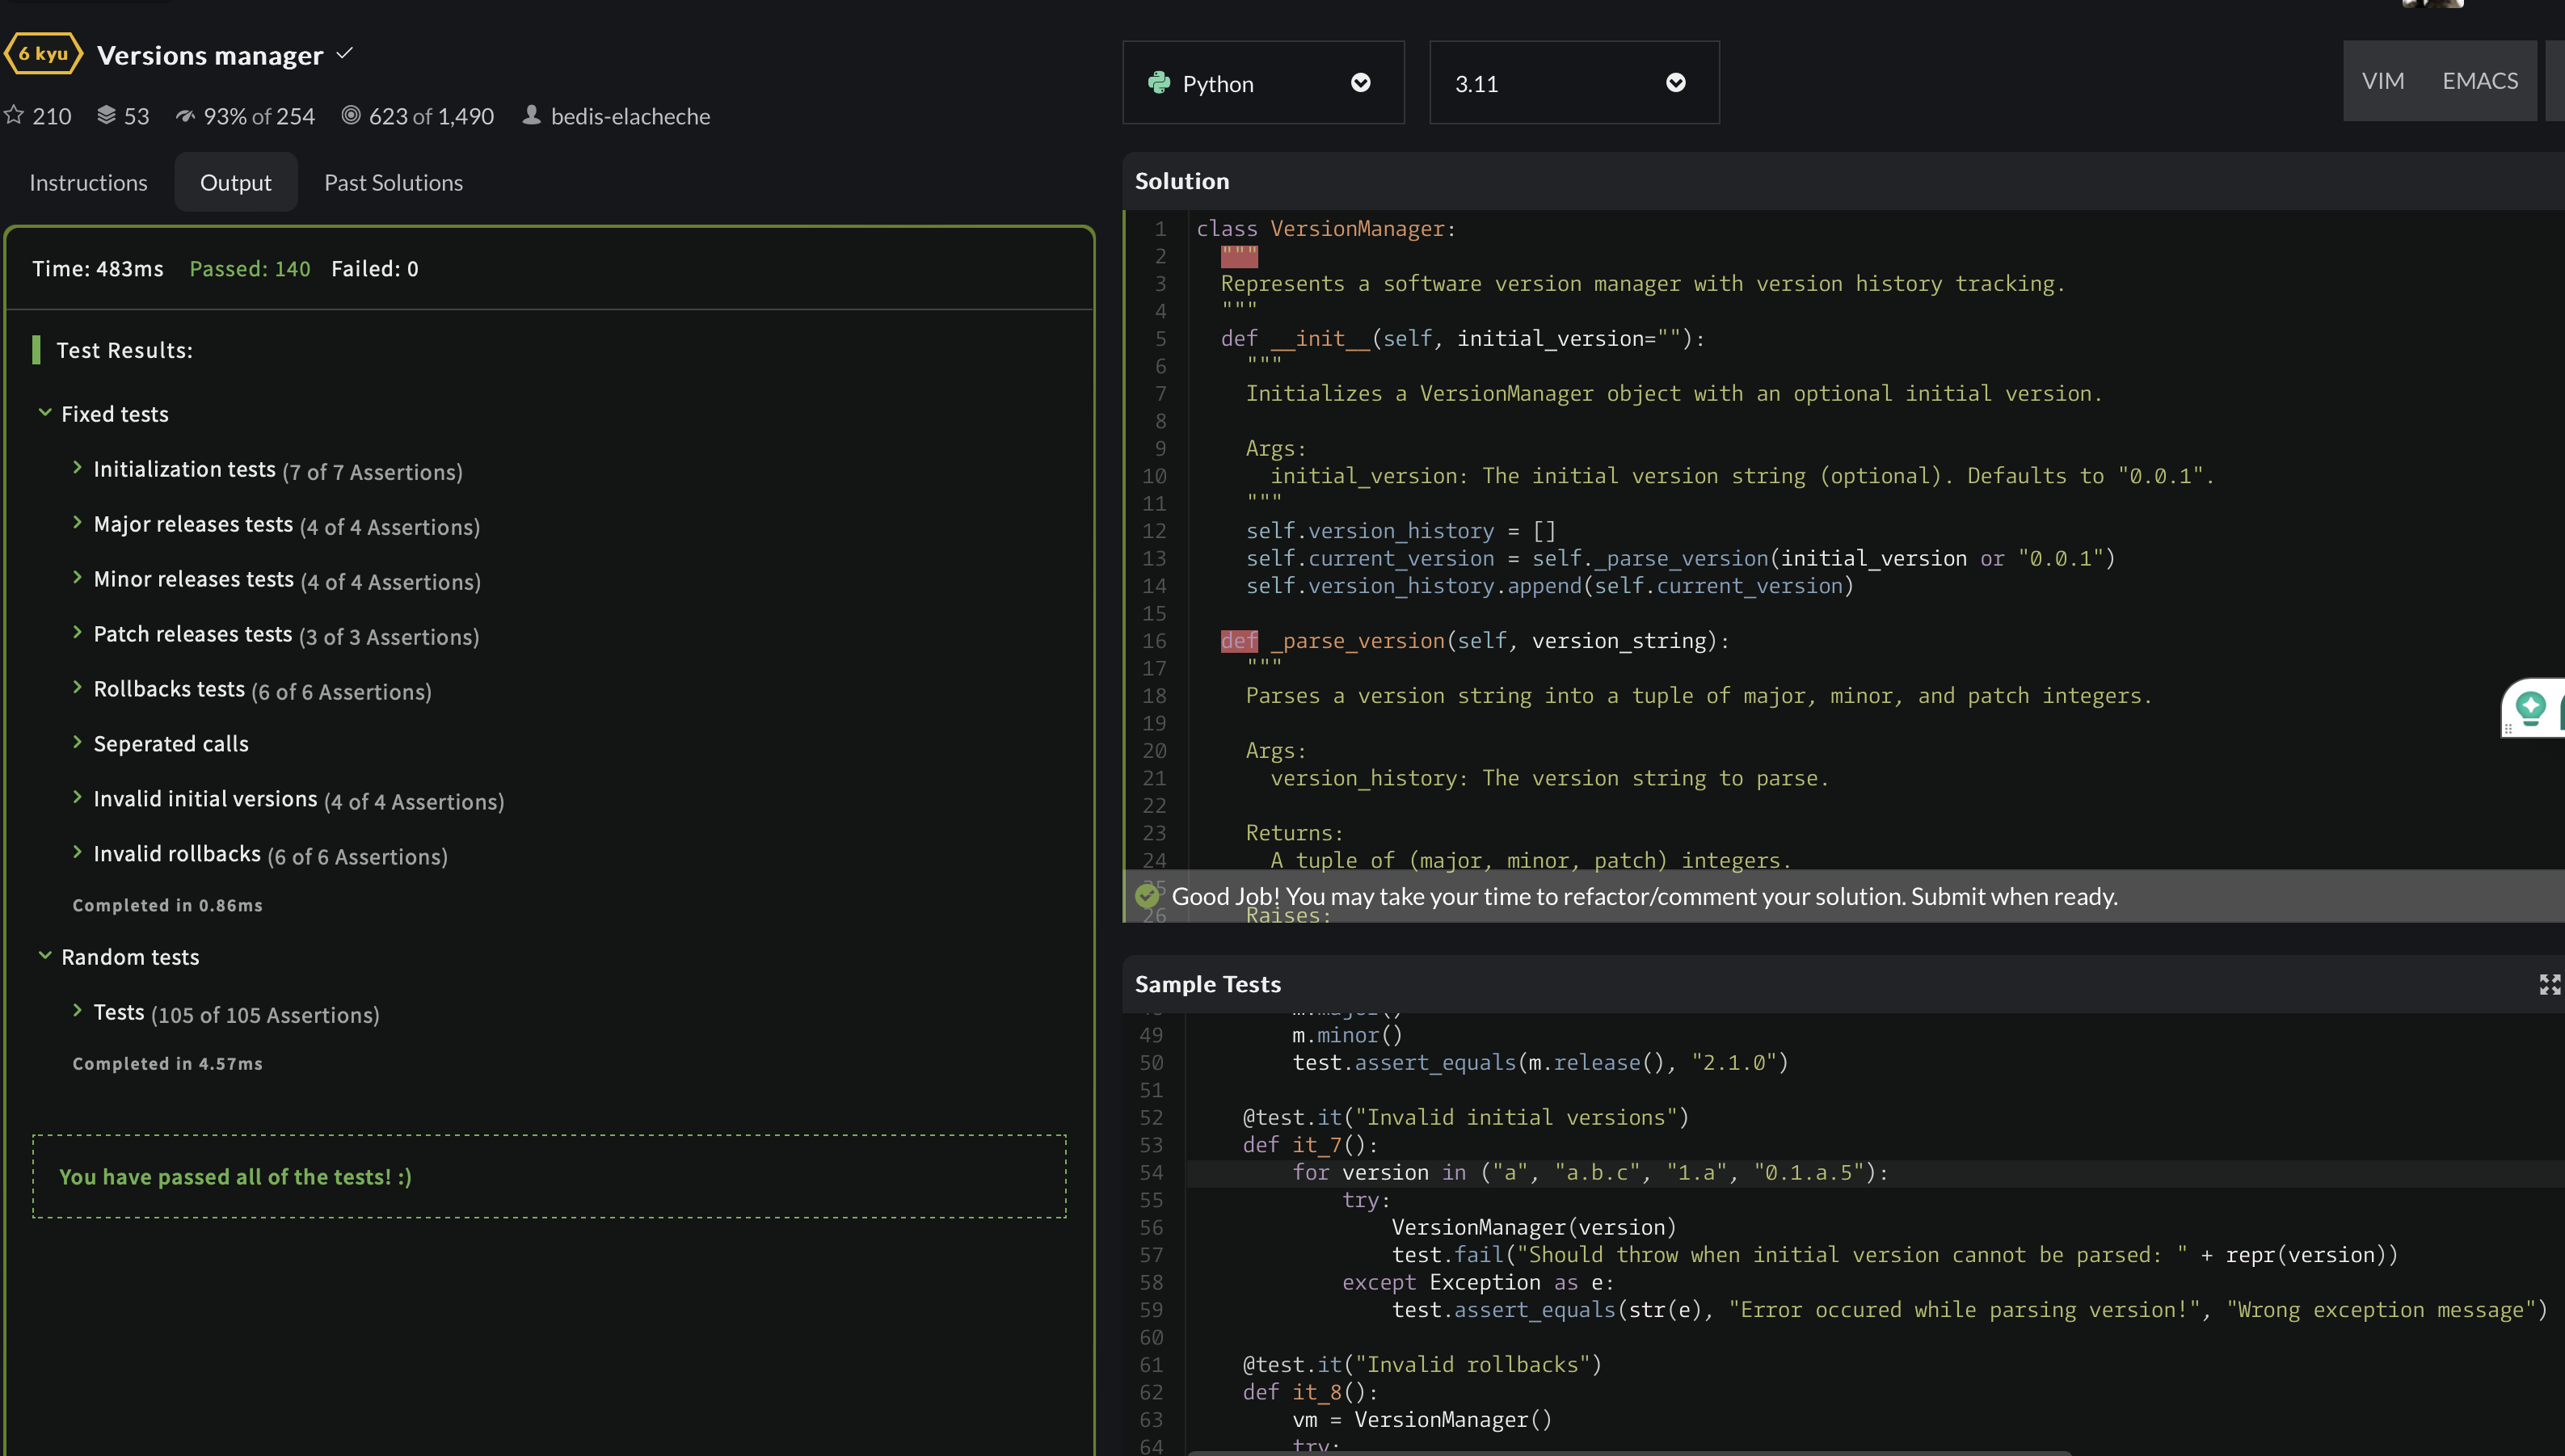